In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import csv

import fasttext

In [2]:
train=pd.read_csv('/kaggle/input/sejong-ai-challenge-p2/train.csv',usecols=[1,2])
test=pd.read_csv('/kaggle/input/sejong-ai-challenge-p2/test.csv',usecols=[1])
submit=pd.read_csv('/kaggle/input/sejong-ai-challenge-p2/sample_submission.csv')

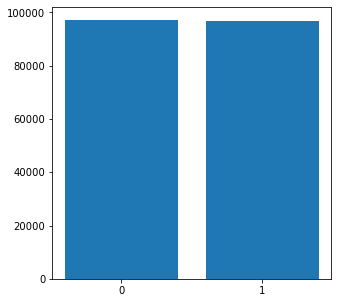

In [3]:
temp=train['Label'].value_counts()

fig,ax=plt.subplots(1,1,figsize=(5,5))

ax.bar(temp.index,temp)
ax.set_xticks(range(2))
ax.set_xticklabels(['0','1'])

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

Target=target=train['Label']
Train=train.drop('Label',axis=1)

X_tr,X_val,y_tr,y_val=train_test_split(Train,Target,test_size=0.2,stratify=Target,random_state=71)

In [5]:
tr_arr=[]
val_arr=[]
test_arr=[]

for i,row in X_tr.iterrows():
    target=y_tr.loc[i]
    label=f"__label__{target}"+" "+str(row['Text'])
    tr_arr.append(label)

for i,row in X_val.iterrows():
    val_arr.append(str(row['Text']))
    
for i,row in test.iterrows():
    test_arr.append(str(row['Text']))

In [6]:
train_df=pd.DataFrame(tr_arr)
train_df.to_csv('train.txt',index=False,sep=' ',header=False,quoting=csv.QUOTE_NONE,quotechar="",escapechar=" ")

In [7]:
model=fasttext.train_supervised('train.txt',label_prefix='__label__',epoch=5)

In [8]:
from sklearn.metrics import accuracy_score

val_arr=[re.sub(r'\n','',text) for text in val_arr]
pred=[int(label[0][-1]) for label in model.predict(val_arr)[0]]
print(f"val_acc : {accuracy_score(pred,y_val.values)}")

val_acc : 0.9026733285258062


In [9]:
test_arr=[re.sub(r'\n','',text) for text in test_arr]

pred=[int(label[0][-1]) for label in model.predict(test_arr)[0]]

In [10]:
submit['Label']=pred
submit.head()

,id,Label
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [11]:
submit.to_csv('submission.csv',index=False)